In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.externals.six import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.datasets import load_iris, load_boston, load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

c:\django_projects\untitled\venv\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
wine = load_wine()

In [3]:
wine_x_ds = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [4]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(15,7)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data


In [5]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.2, random_state=1)

In [6]:
rf = RandomForestClassifier(n_estimators=1, max_depth=2, random_state=3).fit(wine_X_train, wine_y_train) 
target_rf = rf.predict(wine_X_test)

In [7]:
accuracy_score(wine_y_test, target_rf) 

0.9444444444444444

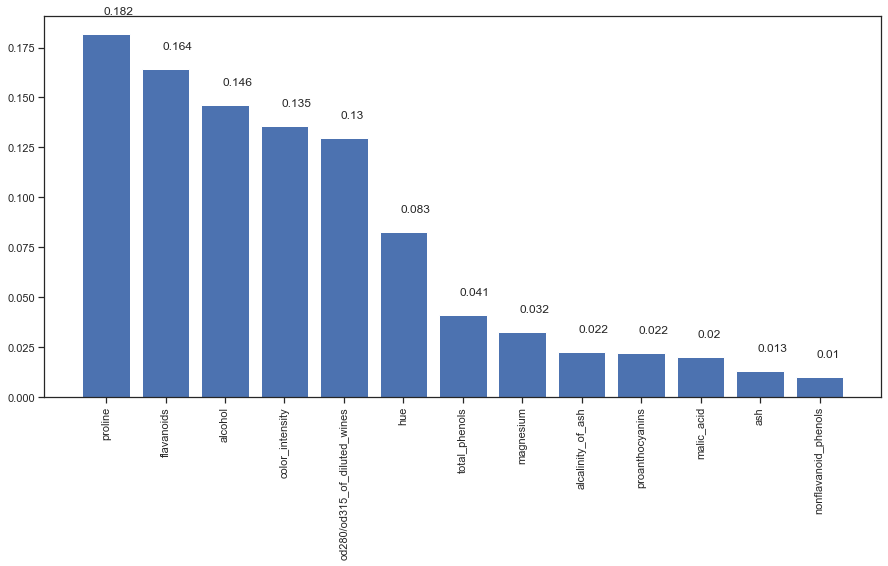

In [8]:
# Важность признаков
wine_rf_cl = RandomForestClassifier(random_state=1)
wine_rf_cl.fit(wine_x_ds, wine.target)
_,_ = draw_feature_importances(wine_rf_cl, wine_x_ds)

In [9]:
gb = GradientBoostingClassifier(n_estimators=5, max_depth=2, learning_rate=0.05).fit(wine_X_train, wine_y_train)
target_gb = gb.predict(wine_X_test) 

In [10]:
accuracy_score(wine_y_test, target_gb)

0.9444444444444444

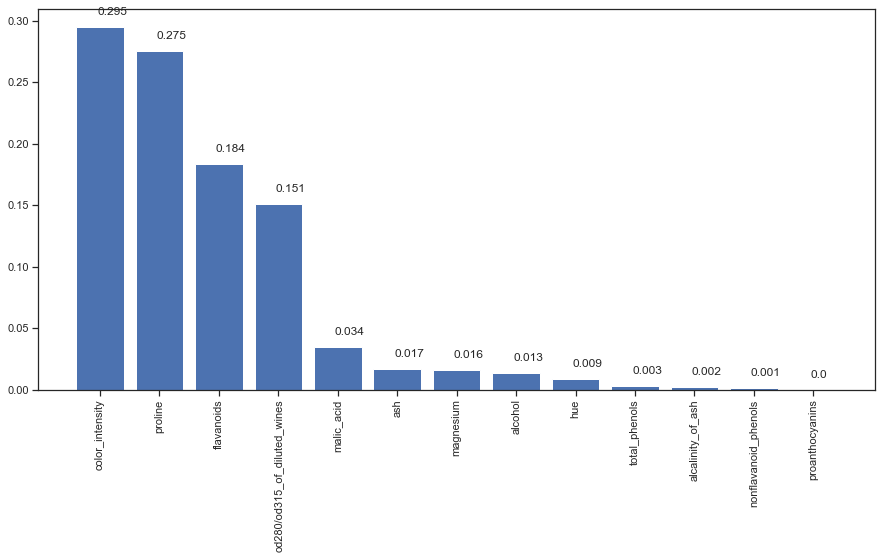

In [11]:
# Важность признаков
wine_gb_cl = GradientBoostingClassifier(random_state=1)
wine_gb_cl.fit(wine_x_ds, wine.target)
_,_ = draw_feature_importances(wine_gb_cl, wine_x_ds)
